In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2
# from IPython.display import display, HTML
# display(HTML("<style>.container { width:100% !important; }</style>"))

Populating the interactive namespace from numpy and matplotlib


In [2]:
import feature_extractor as fe
import data_cleaner as dc
from IPython.display import display
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import time
import seaborn as sns
import pandas as pd

In [22]:
features_csv = "/home/ryan.zurrin001/Projects/CS438/labels/features_balanced_scaled_mulitplicative.csv"

In [23]:
# Load the DataFrame
df_features = pd.read_csv(feature_path)

In [3]:
# cache_path = "/home/ryan.zurrin001/binlink/sample_dataset.pkl"
cache_path = "/home/ryan.zurrin001/binlink/cs438_features_imgs.pkl"

In [4]:
# Load the DataFrame
df_features = pd.read_pickle(cache_path)

In [5]:
len(df_features)

163568

In [9]:
len(df_features.columns)

36

In [10]:
df_features.columns

Index(['path', 'label', 'StudyInstanceUID', 'ImageLaterality',
       'SOPInstanceUID', 'PatientAge', 'Manufacturer', 'ManufacturerModelName',
       'DistanceSourceToDetector', 'DistanceSourceToPatient', 'ExposureTime',
       'XRayTubeCurrent', 'Exposure', 'ExposureInuAs', 'KVP',
       'BodyPartThickness', 'CompressionForce', 'PositionerPrimaryAngle',
       'ViewPosition', 'DetectorTemperature', 'DetectorType',
       'FieldOfViewOrigin', 'Rows', 'Columns', 'PixelSpacing',
       'BreastImplantPresent', 'WindowCenter', 'WindowWidth', 'HalfValueLayer',
       'original_shape', 'shape', 'coords', 'resized_coords', 'score',
       'histogram', 'image'],
      dtype='object')

In [28]:
columns_to_display = ['label', 'score', 'ImageLaterality', 'PatientAge', 'Manufacturer', 'ManufacturerModelName', 'ExposureTime','WindowCenter', 'coords']

In [29]:
display(df_features[columns_to_display])

,label,score,ImageLaterality,PatientAge,Manufacturer,ManufacturerModelName,ExposureTime,WindowCenter,coords
0,NonCancer,0.114345,R,476M,GE MEDICAL SYSTEMS,Senographe Essential VERSION ADS_54.20,654,"[2839, 2863, 2809]","(1986.0, 960.0, 2264.0, 1269.0)"
1,NonCancer,0.244264,L,621M,GE MEDICAL SYSTEMS,Senographe Essential VERSION ADS_53.40,962,"[3049, 3079, 3001]","(385.0, 1962.0, 687.0, 2256.0)"
2,Unknown,0.077584,R,876M,GE MEDICAL SYSTEMS,Senographe Essential VERSION ADS_54.20,633,"[2743, 2779, 2695]","(1013.0, 1497.0, 1250.0, 1761.0)"
3,Unknown,0.005008,R,401M,GE MEDICAL SYSTEMS,Senographe Essential VERSION ADS_53.40,638,"[2845, 2863, 2821]","(1334.0, 1676.0, 1674.0, 2011.0)"
4,NonCancer,0.112289,R,532M,GE MEDICAL SYSTEMS,Senographe Essential VERSION ADS_54.20,858,"[3163, 3211, 3085]","(1782.0, 2036.0, 1897.0, 2155.0)"
...,...,...,...,...,...,...,...,...,...
163563,NonCancer,0.463245,L,739M,GE MEDICAL SYSTEMS,Senographe Essential VERSION ADS_53.40,940,"[2785, 2827, 2731]","(572.0, 908.0, 895.0, 1224.0)"
163564,NonCancer,0.201444,L,641M,GE MEDICAL SYSTEMS,Senographe Essential VERSION ADS_53.10.1.1,1243,"[2635, 2701, 2545]","(260.0, 1701.0, 603.0, 1983.0)"
163565,NonCancer,0.122635,R,724M,GE MEDICAL SYSTEMS,Senographe Essential VERSION ADS_53.40,947,"[2131, 2149, 2101]","(1543.0, 596.0, 1752.0, 804.0)"
163566,NonCancer,0.380193,L,382M,GE MEDICAL SYSTEMS,Senographe Essential VERSION ADS_53.40,990,"[2785, 2815, 2743]","(117.0, 1549.0, 348.0, 1762.0)"


In [7]:
cleaner = dc.DataCleaner(df_features)

In [11]:
print("Initial length:", len(cleaner.df))

Initial length: 163568


In [12]:
to_multiply = [
    ['WindowCenter1', 'WindowCenter2', 'WindowCenter3', 'WindowCenter4', 'histogram_max'],
    ['WindowWidth1', 'WindowWidth2', 'WindowWidth3', 'WindowWidth4', 'flattened_image_std']
]

In [13]:
img_data, cleaned_df = cleaner.clean_data(return_img_mask_data=True, balance_classes=True, scale=True, multiplicative_features=to_multiply)

Cleaning data...
drop unnecessary columns
handle missing values
process ages
label encode
map labels
handle missing values
add correctness column
balance classes
create binary masks


Processing Data:   0%|          | 0/33064 [00:00<?, ?it/s]

expand and extend columns


Expanding Columns:   0%|          | 0/2 [00:00<?, ?it/s]

Extending Columns:   0%|          | 0/3 [00:00<?, ?it/s]

process and flatten columns
handle missing values
enforce numeric data types
add multiplicative features
scale data


In [14]:
len(cleaned_df)

33064

In [15]:
cleaned_df.columns

Index(['label', 'ImageLaterality', 'PatientAge', 'Manufacturer',
       'ManufacturerModelName', 'DistanceSourceToDetector',
       'DistanceSourceToPatient', 'ExposureTime', 'XRayTubeCurrent',
       'Exposure', 'ExposureInuAs', 'KVP', 'BodyPartThickness',
       'CompressionForce', 'PositionerPrimaryAngle', 'ViewPosition',
       'DetectorTemperature', 'DetectorType', 'Rows', 'Columns', 'score',
       'target_label', 'coords1', 'coords2', 'coords3', 'coords4',
       'resized_coords1', 'resized_coords2', 'resized_coords3',
       'resized_coords4', 'FieldOfViewOrigin1', 'FieldOfViewOrigin2',
       'WindowCenter1', 'WindowCenter2', 'WindowCenter3', 'WindowCenter4',
       'WindowWidth1', 'WindowWidth2', 'WindowWidth3', 'WindowWidth4',
       'histogram_mean', 'histogram_median', 'histogram_std', 'histogram_min',
       'histogram_max', 'histogram_percentile_25', 'histogram_percentile_50',
       'histogram_percentile_75', 'flattened_image_mean',
       'flattened_image_median', 'fla

In [13]:
len(cleaned_df.columns)

56

In [14]:
columns_to_display = ['label', 'target_label', 'score', 'ImageLaterality', 'PatientAge', 'Manufacturer', 'ManufacturerModelName', 'ExposureTime', 'WindowCenter1', 'WindowCenter2', 'WindowCenter3', 'WindowCenter4',  'coords1', 'coords2', 'coords3', 'coords4']

In [15]:
display(cleaned_df[columns_to_display])

,label,target_label,score,ImageLaterality,PatientAge,Manufacturer,ManufacturerModelName,ExposureTime,WindowCenter1,WindowCenter2,WindowCenter3,WindowCenter4,coords1,coords2,coords3,coords4
0,-0.335826,1,-0.555146,1.003029,-1.019133,-0.260959,0.400808,0.543056,0.119147,0.249665,0.224207,-0.069453,1.089693,-1.372750,0.971151,-1.422187
1,-0.335826,1,0.248554,-0.996980,-0.596168,-0.260959,0.400808,-0.542750,0.017967,0.193974,0.191267,-0.069453,-1.254387,0.233532,-1.338441,0.108905
2,-0.335826,1,-1.348299,1.003029,0.464828,4.106723,-3.352535,-0.480704,-2.288941,-3.474985,-3.466385,-0.069453,0.587816,1.862567,0.856480,2.140080
3,2.977735,0,-0.941656,1.003029,0.156566,-0.260959,0.400808,-0.586182,-0.791474,-0.124258,-0.129892,-0.069453,1.234150,0.779578,0.971151,0.683890
4,2.977735,0,-0.282716,-0.996980,-0.359595,-0.260959,0.963809,0.046687,-0.042741,0.162151,0.207737,-0.069453,-0.959515,0.240358,-0.937093,0.276333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33059,-0.335826,1,-0.794353,1.003029,-0.452790,-0.260959,-0.162194,0.037381,1.576142,0.806573,0.841822,-0.069453,0.909494,-1.033747,0.810905,-1.122578
33060,-0.335826,0,0.499121,1.003029,-0.459959,-0.260959,0.400808,-0.210804,0.726228,0.472428,0.487722,-0.069453,1.138838,-0.683368,0.921166,-0.966164
33061,-0.335826,0,0.917829,1.003029,-0.703702,-0.260959,-0.162194,0.239030,0.382216,0.329223,0.372434,-0.069453,1.545404,-0.469501,1.525394,-0.360337
33062,2.977735,0,-0.650843,-0.996980,0.493504,-0.260959,-0.162194,-0.226315,-0.002269,0.209886,0.158328,-0.069453,-0.684004,0.285862,-0.762146,0.172792


In [14]:
display(cleaned_df[columns_to_display])

,label,target_label,score,ImageLaterality,PatientAge,Manufacturer,ManufacturerModelName,ExposureTime,WindowCenter1,WindowCenter2,WindowCenter3,WindowCenter4,coords1,coords2,coords3,coords4
0,0,1,0.114345,1,39.666667,0,25,654,2839.0,2863.0,2809.0,0.0,1986.0,960.0,2264.0,1269.0
1,0,1,0.244264,0,51.750000,0,22,962,3049.0,3079.0,3001.0,0.0,385.0,1962.0,687.0,2256.0
4,0,1,0.112289,1,44.333333,0,25,858,3163.0,3211.0,3085.0,0.0,1782.0,2036.0,1897.0,2155.0
5,0,1,0.365428,0,75.250000,0,22,1107,2665.0,2713.0,2593.0,0.0,355.0,1127.0,736.0,1456.0
6,0,1,0.064458,1,56.500000,0,19,989,2671.0,2719.0,2611.0,0.0,1297.0,1218.0,1686.0,1534.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163563,0,1,0.463245,0,61.583333,0,22,940,2785.0,2827.0,2731.0,0.0,572.0,908.0,895.0,1224.0
163564,0,1,0.201444,0,53.416667,0,19,1243,2635.0,2701.0,2545.0,0.0,260.0,1701.0,603.0,1983.0
163565,0,1,0.122635,1,60.333333,0,22,947,2131.0,2149.0,2101.0,0.0,1543.0,596.0,1752.0,804.0
163566,0,1,0.380193,0,31.833333,0,22,990,2785.0,2815.0,2743.0,0.0,117.0,1549.0,348.0,1762.0


In [27]:
len(cleaned_df)

161299

In [16]:
cleaned_df

,label,ImageLaterality,PatientAge,Manufacturer,ManufacturerModelName,DistanceSourceToDetector,DistanceSourceToPatient,ExposureTime,XRayTubeCurrent,Exposure,...,histogram_percentile_50,histogram_percentile_75,flattened_image_mean,flattened_image_median,flattened_image_std,flattened_image_min,flattened_image_max,flattened_image_percentile_25,flattened_image_percentile_50,flattened_image_percentile_75
0,0,1,39.666667,0,25,660.0,660.0,654,62,41,...,0.000076,0.000168,58.695709,7.0,82.222314,0,242,6.0,7.0,181.0
1,0,0,51.750000,0,22,660.0,660.0,962,61,60,...,0.000076,0.000290,98.803879,0.0,102.330416,0,246,0.0,0.0,203.0
4,0,1,44.333333,0,25,660.0,660.0,858,62,53,...,0.000107,0.000587,63.388824,14.0,79.600343,0,253,13.0,14.0,178.0
5,0,0,75.250000,0,22,660.0,660.0,1107,62,69,...,0.000076,0.000366,56.863647,0.0,74.328708,0,229,0.0,0.0,149.0
6,0,1,56.500000,0,19,660.0,660.0,989,62,61,...,0.000122,0.001701,84.603943,138.0,76.137374,0,205,5.0,138.0,156.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163563,0,0,61.583333,0,22,660.0,660.0,940,61,58,...,0.000061,0.000175,56.462296,7.0,73.238716,0,228,6.0,7.0,159.0
163564,0,0,53.416667,0,19,660.0,660.0,1243,60,75,...,0.000122,0.000473,74.738174,0.0,89.472290,0,245,0.0,0.0,177.0
163565,0,1,60.333333,0,22,660.0,660.0,947,62,59,...,0.000107,0.000595,47.728088,5.0,70.445899,0,246,4.0,5.0,144.0
163566,0,0,31.833333,0,22,660.0,660.0,990,61,62,...,0.000061,0.000153,53.578430,2.0,89.580247,0,250,1.0,2.0,79.0


In [28]:
cleaned_df.iloc[4]

label                                    0
ImageLaterality                          1
PatientAge                            56.5
Manufacturer                             0
ManufacturerModelName                   19
DistanceSourceToDetector             660.0
DistanceSourceToPatient              660.0
ExposureTime                           989
XRayTubeCurrent                         62
Exposure                                61
ExposureInuAs                        61400
KVP                                   29.0
BodyPartThickness                     56.0
CompressionForce                      90.0
PositionerPrimaryAngle                54.0
ViewPosition                             1
DetectorTemperature                30.3946
DetectorType                             1
Rows                                  3062
Columns                               2394
score                             0.064458
target_label                             1
coords1                             1297.0
coords2    

In [14]:
len(cleaned_df)

33064

In [15]:
len(img_data)

33064

In [17]:
idx = 6

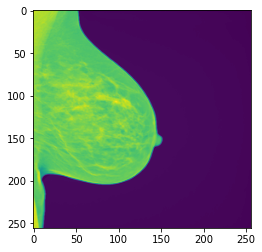

In [18]:
imshow(img_data[idx, :, :, 0] )

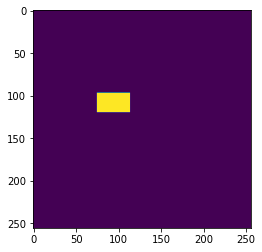

In [19]:
imshow(img_data[idx, :, :, 1] )

              label  ImageLaterality    PatientAge  Manufacturer  \
count  3.306400e+04     3.306400e+04  3.306400e+04  3.306400e+04   
mean   4.212024e-17    -3.610307e-17  1.461315e-16  3.647242e-17   
std    1.000015e+00     1.000015e+00  1.000015e+00  1.000015e+00   
min   -3.358257e-01    -9.969801e-01 -3.327517e+00 -2.609593e-01   
25%   -3.358257e-01    -9.969801e-01 -7.252082e-01 -2.609593e-01   
50%   -3.358257e-01    -9.969801e-01  1.318800e-02 -2.609593e-01   
75%   -3.358257e-01     1.003029e+00  7.014020e-01 -2.609593e-01   
max    2.977735e+00     1.003029e+00  2.335910e+00  6.290565e+00   

       ManufacturerModelName  DistanceSourceToDetector  \
count           3.306400e+04              3.306400e+04   
mean            3.431134e-16             -8.213448e-16   
std             1.000015e+00              1.000015e+00   
min            -3.727869e+00             -7.460244e-02   
25%            -1.621938e-01             -7.460244e-02   
50%             4.008076e-01           

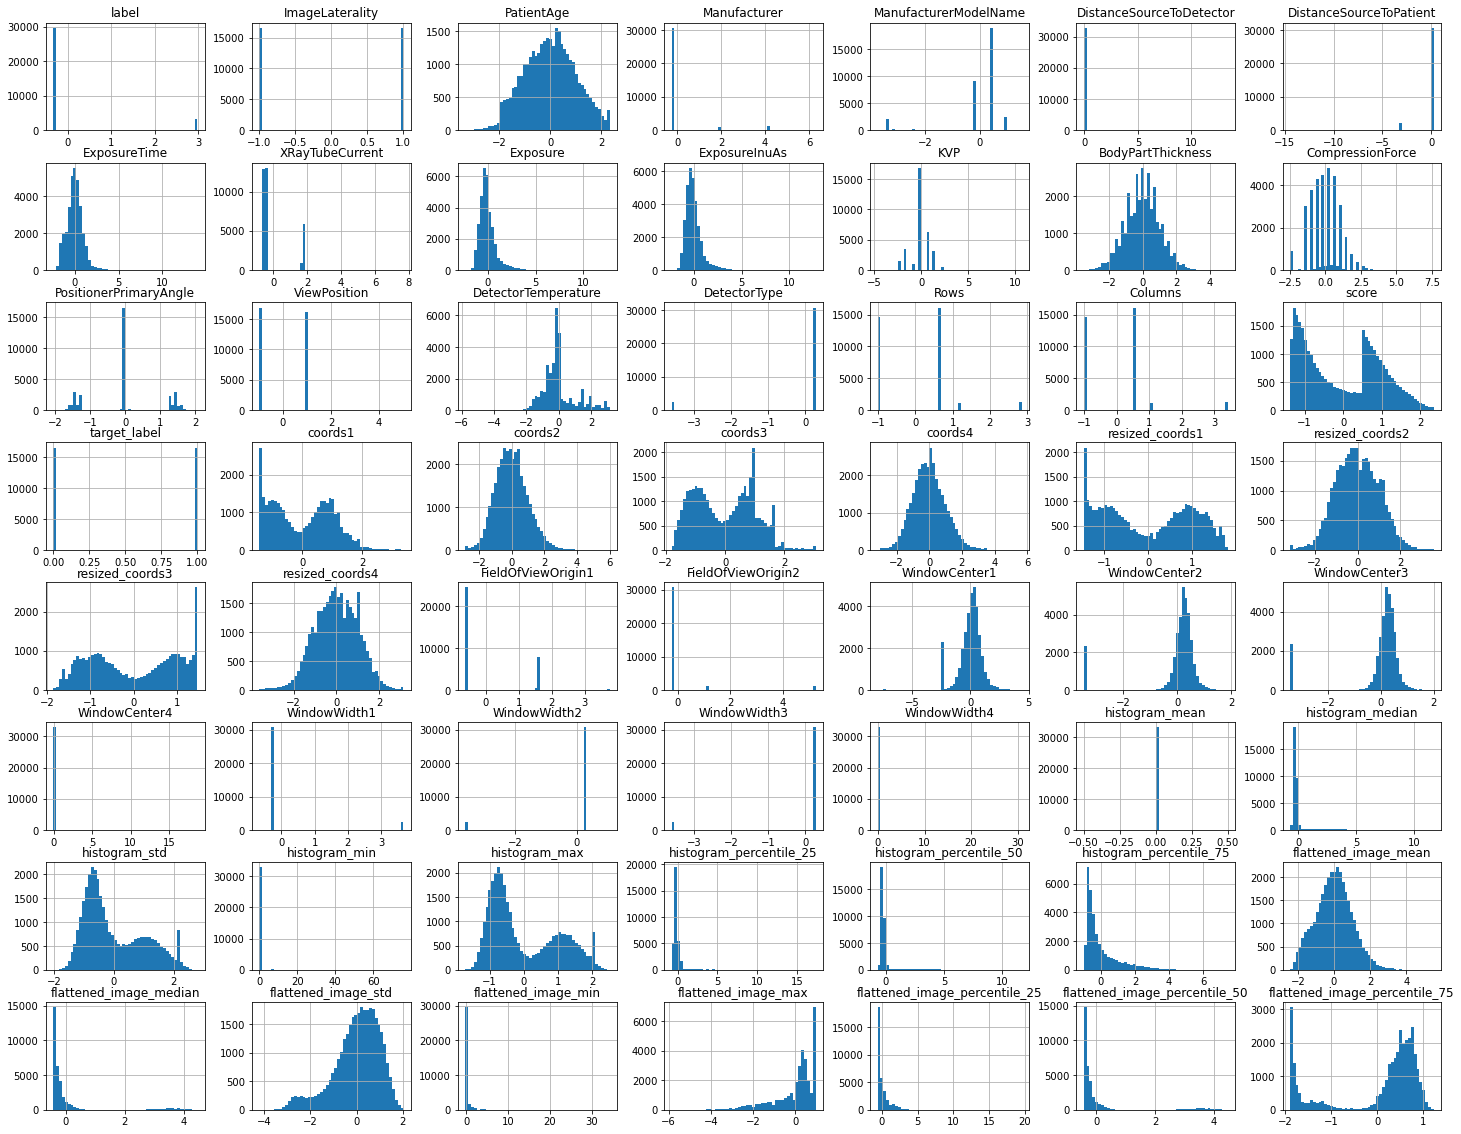

In [20]:
# Descriptive statistics
print(cleaned_df.describe())

# Histograms for feature distribution
cleaned_df.hist(bins=50, figsize=(25,20))
plt.show()


In [ ]:
# Select a subset of features for clarity
# 'label', 'ImageLaterality', 'PatientAge', 'Manufacturer',
#        'ManufacturerModelName', 'DistanceSourceToDetector',
#        'DistanceSourceToPatient', 'ExposureTime', 'XRayTubeCurrent',
#        'Exposure', 'ExposureInuAs', 'KVP', 'BodyPartThickness',
#        'CompressionForce', 'PositionerPrimaryAngle', 'ViewPosition',
#        'DetectorTemperature', 'DetectorType', 'Rows', 'Columns', 'score',
#        'target_label', 'coords1', 'coords2', 'coords3', 'coords4',
#        'resized_coords1', 'resized_coords2', 'resized_coords3',
#        'resized_coords4', 'FieldOfViewOrigin1', 'FieldOfViewOrigin2',
#        'WindowCenter1', 'WindowCenter2', 'WindowCenter3', 'WindowCenter4',
#        'WindowWidth1', 'WindowWidth2', 'WindowWidth3', 'WindowWidth4',
#        'histogram_mean', 'histogram_median', 'histogram_std', 'histogram_min',
#        'histogram_max', 'histogram_percentile_25', 'histogram_percentile_50',
#        'histogram_percentile_75', 'flattened_image_mean',
#        'flattened_image_median', 'flattened_image_std', 'flattened_image_min',
#        'flattened_image_max', 'flattened_image_percentile_25',
#        'flattened_image_percentile_50', 'flattened_image_percentile_75'

subset_of_features = [
    'label', 'ImageLaterality','PatientAge', 'Manufacturer',
    'ManufacturerModelName', 'DistanceSourceToDetector',
    'DistanceSourceToPatient', 'ExposureTime', 'XRayTubeCurrent',
    'Exposure', 'ExposureInuAs', 'KVP', 'BodyPartThickness',
    'CompressionForce', 'PositionerPrimaryAngle', 'ViewPosition',
    'DetectorTemperature', 'DetectorType', 'Rows', 'Columns', 'score',
    'target_label', 'coords1', 'coords2', 'coords3', 'coords4',
    'resized_coords1', 'resized_coords2', 'resized_coords3',
    'resized_coords4', 'FieldOfViewOrigin1', 'FieldOfViewOrigin2',
    'WindowCenter1', 'WindowCenter2', 'WindowCenter3', 'WindowCenter4',
    'WindowWidth1', 'WindowWidth2', 'WindowWidth3', 'WindowWidth4',
    'histogram_mean', 'histogram_median', 'histogram_std', 'histogram_min',
    'histogram_max', 'histogram_percentile_25', 'histogram_percentile_50',
    'histogram_percentile_75', 'flattened_image_mean',
    'flattened_image_median', 'flattened_image_std', 'flattened_image_min',
    'flattened_image_max', 'flattened_image_percentile_25',
    'flattened_image_percentile_50', 'flattened_image_percentile_75'
]

# Plot histograms for the subset of features
cleaned_df[subset_of_features].hist(bins=50, figsize=(25,20))
plt.show()

# Plot density plots for the subset of features
cleaned_df[subset_of_features].plot(kind='density', subplots=True, layout=(7,8), sharex=False, figsize=(15,10))
plt.show()

# Box plots for the subset of features
cleaned_df[subset_of_features].plot(kind='box', subplots=True, layout=(7,8), sharex=False, sharey=False, figsize=(15,10))
plt.show()


In [47]:
corr_matrix = cleaned_df.corr()

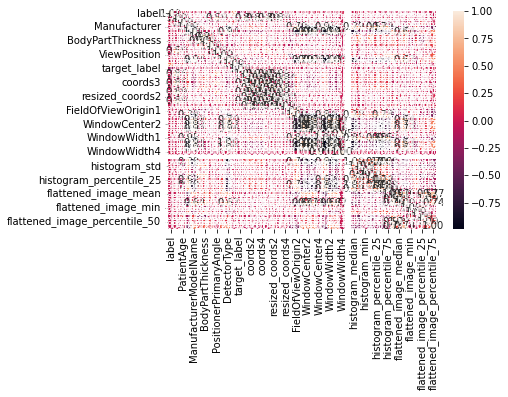

In [49]:
sns.heatmap(corr_matrix, annot=True, fmt=".2f")
plt.show()

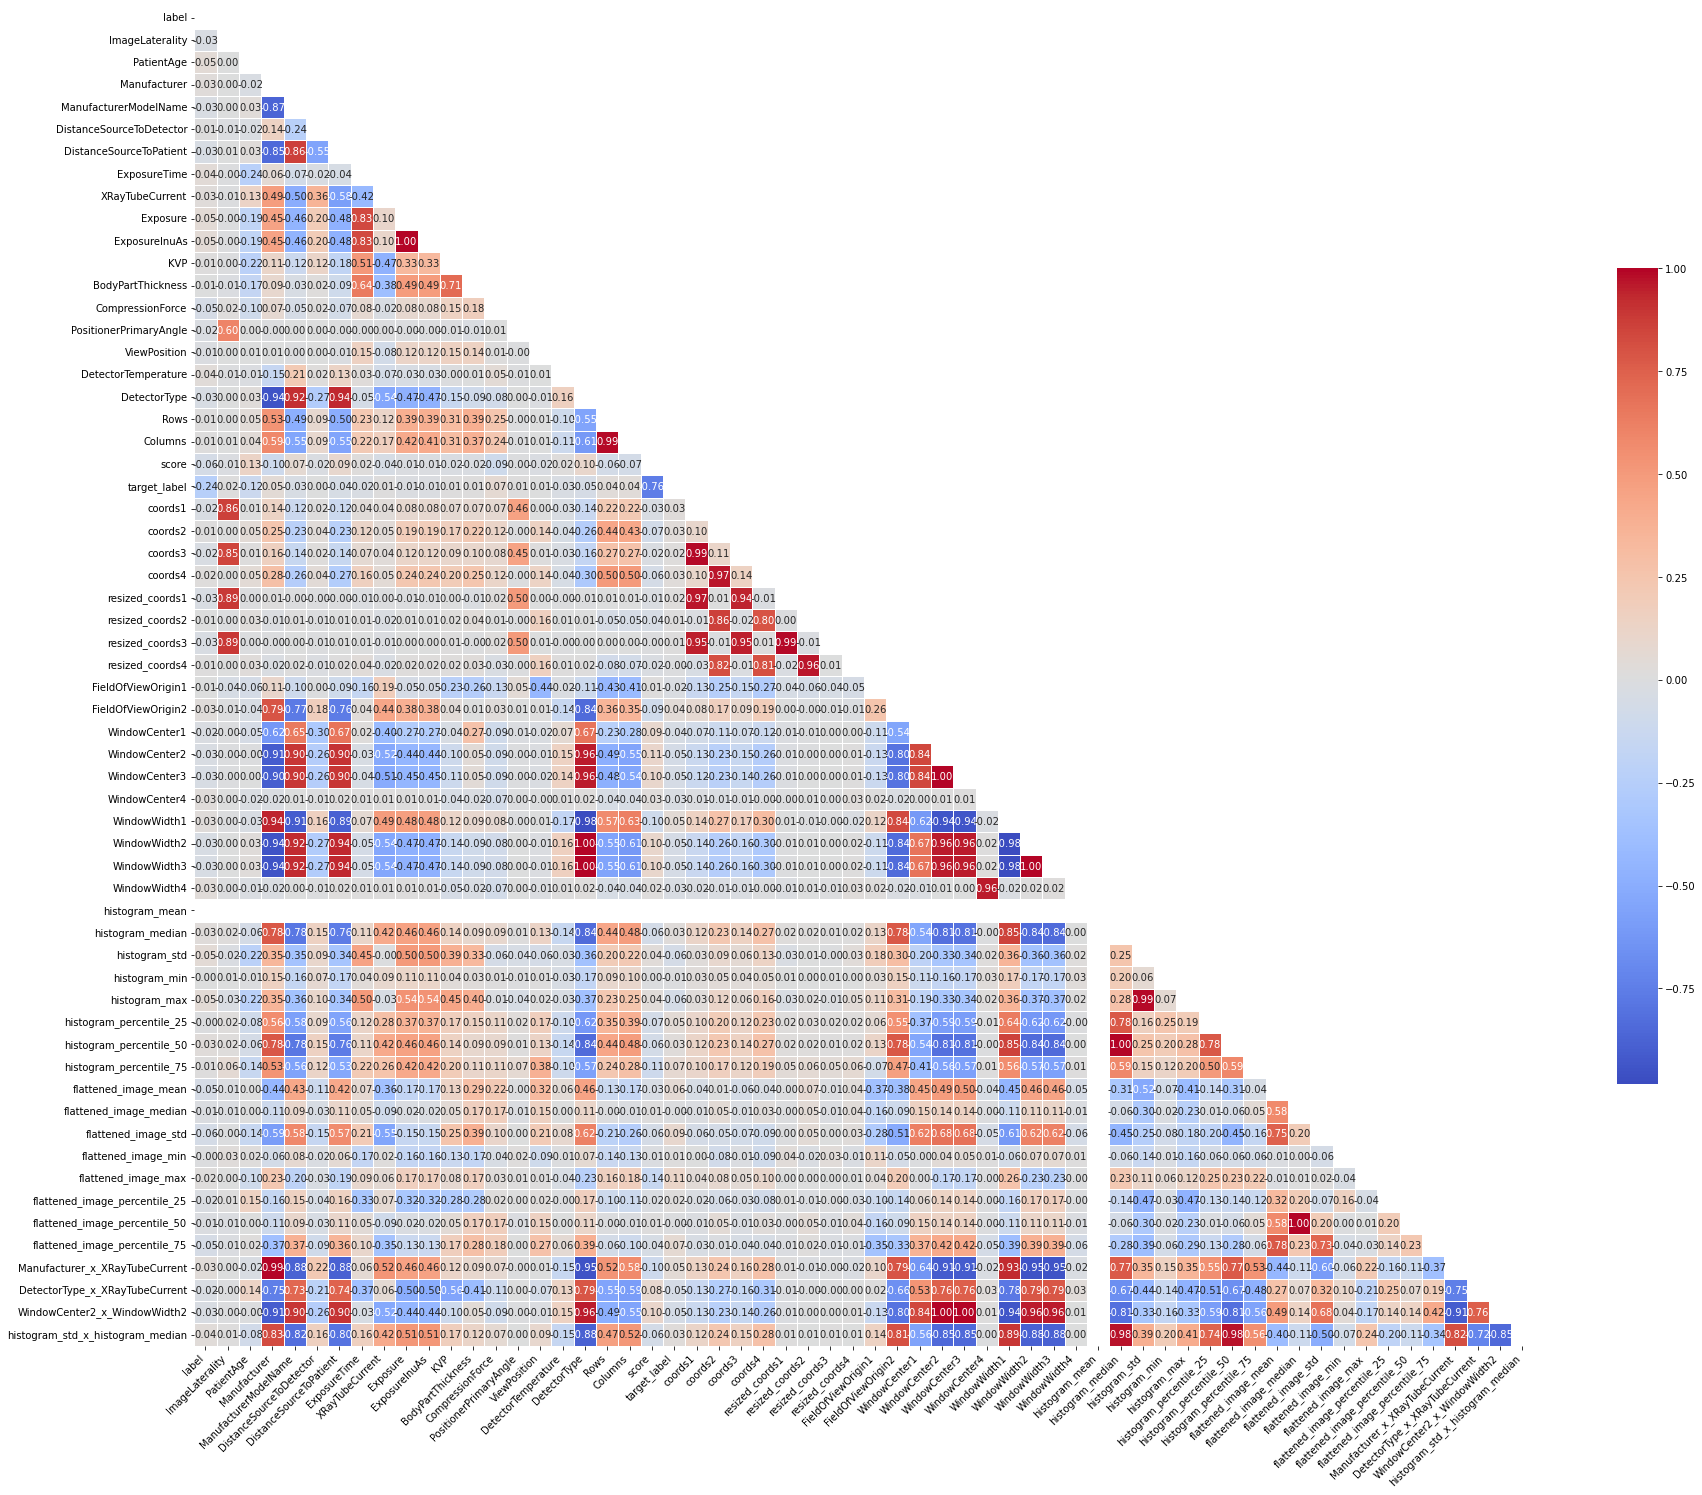

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation matrix
corr_matrix = df_features.corr()

# Set up the matplotlib figure
plt.figure(figsize=(30, 30))

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Draw the heatmap with the mask
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt=".2f", 
            cmap='coolwarm', square=True, cbar_kws={"shrink": .5},
            linewidths=.5)

# Rotate feature labels
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

plt.show()


In [23]:
len(cleaned_df)

161299

In [41]:
cleaned_df.columns

Index(['label', 'ImageLaterality', 'PatientAge', 'Manufacturer',
       'ManufacturerModelName', 'DistanceSourceToDetector',
       'DistanceSourceToPatient', 'ExposureTime', 'XRayTubeCurrent',
       'Exposure', 'ExposureInuAs', 'KVP', 'BodyPartThickness',
       'CompressionForce', 'PositionerPrimaryAngle', 'ViewPosition',
       'DetectorTemperature', 'DetectorType', 'Rows', 'Columns', 'score',
       'target_label', 'coords1', 'coords2', 'coords3', 'coords4',
       'resized_coords1', 'resized_coords2', 'resized_coords3',
       'resized_coords4', 'FieldOfViewOrigin1', 'FieldOfViewOrigin2',
       'WindowCenter1', 'WindowCenter2', 'WindowCenter3', 'WindowCenter4',
       'WindowWidth1', 'WindowWidth2', 'WindowWidth3', 'WindowWidth4',
       'histogram_mean', 'histogram_median', 'histogram_std', 'histogram_min',
       'histogram_max', 'histogram_percentile_25', 'histogram_percentile_50',
       'histogram_percentile_75', 'flattened_image_mean',
       'flattened_image_median', 'fla

In [16]:
csv_path = "labels/features_balanced_scaled_mult.csv"

In [17]:
cleaned_df.to_csv(csv_path, index=False)

In [26]:
# Remove 'label' and 'score' columns in place
df_features.drop(columns=['label', 'coords1', 'coords2', 'coords3', 'coords4', 'resized_coords1', 'resized_coords2', 'resized_coords3',
       'resized_coords4' ], inplace=True)


In [44]:
unique_values = cleaned_df.nunique()

print("Number of unique values per column:")
print(unique_values)

Number of unique values per column:
ImageLaterality                      2
PatientAge                         723
Manufacturer                         4
ManufacturerModelName               24
DistanceSourceToDetector             2
DistanceSourceToPatient             55
ExposureTime                      1812
XRayTubeCurrent                     36
Exposure                           226
ExposureInuAs                     1393
KVP                                 19
BodyPartThickness                  112
CompressionForce                   280
PositionerPrimaryAngle             145
ViewPosition                         3
DetectorTemperature                479
DetectorType                         2
Rows                                 5
Columns                              6
target_label                         2
FieldOfViewOrigin1                   7
FieldOfViewOrigin2                  31
WindowCenter1                      362
WindowCenter2                      357
WindowCenter3               

In [45]:
# Assuming `df` is your DataFrame and 'target_label' is your column of interest
count_of_values = cleaned_df['target_label'].value_counts()

# This will print the count of each unique value in the 'target_label' column
print(count_of_values)

0    16532
1    16532
Name: target_label, dtype: int64


In [27]:
# Define your features and target variable
X = df_features.drop('target_label', axis=1)  # all columns except the label
y = df_features['target_label']  # the target variable

# Split the dataset
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [46]:
# Define your features and target variable
X = cleaned_df.drop('target_label', axis=1)  # all columns except the label
y = cleaned_df['target_label']  # the target variable

# Split the dataset
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [28]:
# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [29]:
# Initialize the Logistic Regression model
log_reg = LogisticRegression(max_iter=1000)

# Fit the model
log_reg.fit(X_train, y_train)

# Validate the model
y_val_pred = log_reg.predict(X_val)
print(classification_report(y_val, y_val_pred))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88      3243
           1       0.88      0.89      0.88      3370

    accuracy                           0.88      6613
   macro avg       0.88      0.88      0.88      6613
weighted avg       0.88      0.88      0.88      6613



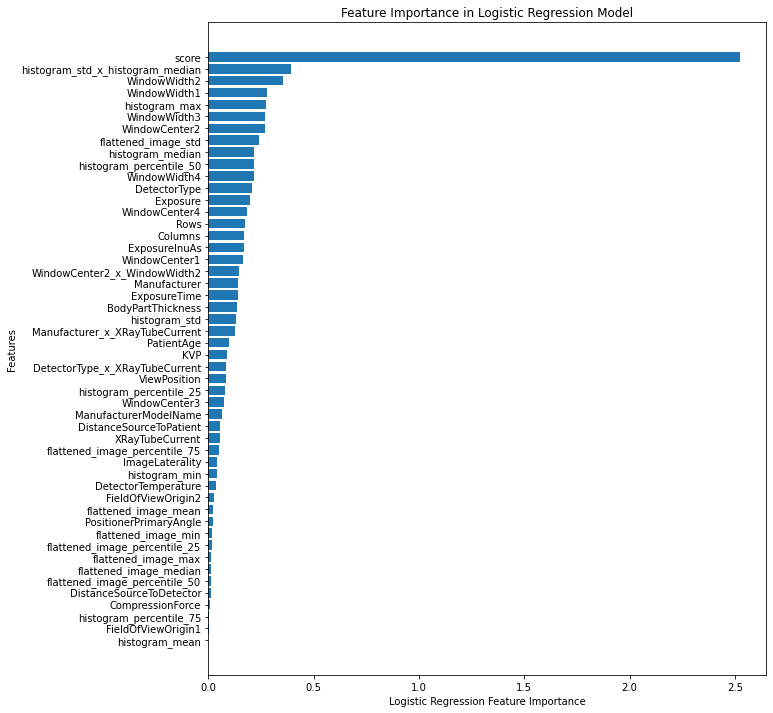

In [30]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Assuming log_reg is your trained Logistic Regression model
feature_importance = abs(log_reg.coef_[0])
sorted_idx = np.argsort(feature_importance)

plt.figure(figsize=(10, 12))  # You can adjust the dimensions (width, height) as needed
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), [X_train.columns[i] for i in sorted_idx])
plt.xlabel('Logistic Regression Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance in Logistic Regression Model')
plt.show()

In [32]:
from models.utils import plot_learning_curve

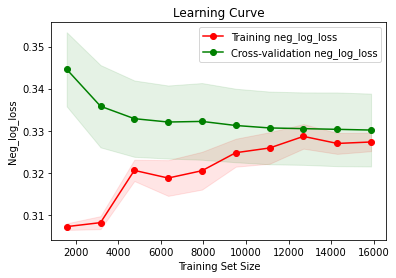

In [33]:
plot_learning_curve(log_reg, X_train, y_train, np.linspace(0.1, 1.0, 10), 5, 'neg_log_loss')

In [38]:
# from sklearn.utils.class_weight import compute_class_weight

# class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
# class_weights_dict = dict(enumerate(class_weights))

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [39]:
# Predict on the test data
y_pred = model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.86      0.90      3293
           1       0.87      0.95      0.91      3320

    accuracy                           0.90      6613
   macro avg       0.91      0.90      0.90      6613
weighted avg       0.91      0.90      0.90      6613

[[2823  470]
 [ 173 3147]]


In [36]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Initialize the grid search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Best parameters
print("Best parameters:", grid_search.best_params_)


Fitting 3 folds for each of 24 candidates, totalling 72 fits
[CV] max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100 


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100, total=   3.5s
[CV] max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100 


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    3.5s remaining:    0.0s


[CV]  max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100, total=   3.5s
[CV] max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100, total=   3.4s
[CV] max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200 
[CV]  max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200, total=   6.9s
[CV] max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200 
[CV]  max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200, total=   6.9s
[CV] max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200 
[CV]  max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200, total=   6.9s
[CV] max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100 
[CV]  max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100, total=   3.7s
[CV] max_depth=None, min_sampl

[CV]  max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=100, total=   3.4s
[CV] max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=100, total=   3.4s
[CV] max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=200 
[CV]  max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=200, total=   6.8s
[CV] max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=200 
[CV]  max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=200, total=   7.1s
[CV] max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=200 
[CV]  max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=200, total=   6.7s
[CV] max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=100 
[CV]  max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=100, total=   3.4s
[CV] max_depth=20, min_samples_leaf=1, min_samples_s

[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:  5.5min finished


Best parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}


In [19]:
# from sklearn.ensemble import RandomForestClassifier

# # Calculate class weights for binary classification
# weight_for_0 = (1 / count_of_values[0]) * (len(cleaned_df) / 2.0)
# weight_for_1 = (1 / count_of_values[1]) * (len(cleaned_df) / 2.0)

# class_weights = {0: weight_for_0, 1: weight_for_1}

# model2 = RandomForestClassifier(class_weight=class_weights, random_state=42)
# model2.fit(X_train_scaled, y_train)

RandomForestClassifier(class_weight={0: 4.8783873699491895,
                                     1: 0.5570986481725807},
                       random_state=42)

In [20]:
# # Predict on the test data
# y_pred = model2.predict(X_test_scaled)

# # Evaluate the model
# print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3307
           1       1.00      1.00      1.00     28953

    accuracy                           1.00     32260
   macro avg       1.00      1.00      1.00     32260
weighted avg       1.00      1.00      1.00     32260

[[ 3305     2]
 [    0 28953]]


In [70]:
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

# Initialize alternative models
# svm_model = SVC(probability=True)
neural_net = MLPClassifier(max_iter=1000)

# Fit alternative models
# Note: These models have their own hyperparameters that you can tune
# svm_model.fit(X_train, y_train)
neural_net.fit(X_train, y_train)

# Validate alternative models
# Evaluate their performance and compare with the logistic regression model

MLPClassifier(max_iter=1000)

In [71]:
# Predict on the test data
y_pred_nn = neural_net.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred_nn))
print(confusion_matrix(y_test, y_pred_nn))

              precision    recall  f1-score   support

           0       0.60      0.60      0.60      3293
           1       0.60      0.60      0.60      3320

    accuracy                           0.60      6613
   macro avg       0.60      0.60      0.60      6613
weighted avg       0.60      0.60      0.60      6613

[[1961 1332]
 [1315 2005]]


In [72]:
from sklearn.metrics import classification_report

# Predict on the validation set
y_pred_neural_net = neural_net.predict(X_val)

# Print classification report
print("Neural Network Classification Report:")
print(classification_report(y_val, y_pred_neural_net))


Neural Network Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.71      0.71      3212
           1       0.73      0.72      0.72      3401

    accuracy                           0.72      6613
   macro avg       0.72      0.72      0.72      6613
weighted avg       0.72      0.72      0.72      6613



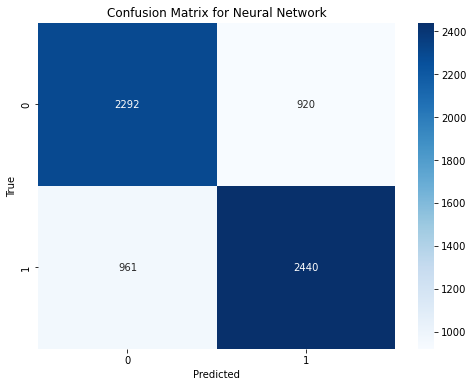

In [73]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate confusion matrix
cm_neural_net = confusion_matrix(y_val, y_pred_neural_net)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_neural_net, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Neural Network')
plt.show()


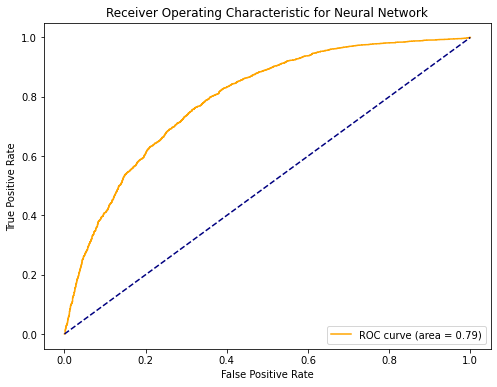

In [74]:
from sklearn.metrics import roc_curve, auc

# Get probability estimates for the positive class
y_prob_neural_net = neural_net.predict_proba(X_val)[:, 1]

# Compute ROC curve and AUC
fpr_neural_net, tpr_neural_net, _ = roc_curve(y_val, y_prob_neural_net)
roc_auc_neural_net = auc(fpr_neural_net, tpr_neural_net)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_neural_net, tpr_neural_net, color='orange', label=f'ROC curve (area = {roc_auc_neural_net:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Neural Network')
plt.legend(loc='lower right')
plt.show()


/home/ryan.zurrin001/miniconda3/envs/O/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ryan.zurrin001/miniconda3/envs/O/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ryan.zurrin001/miniconda3/envs/O/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ryan.zurrin001/miniconda3/envs/O/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't conv

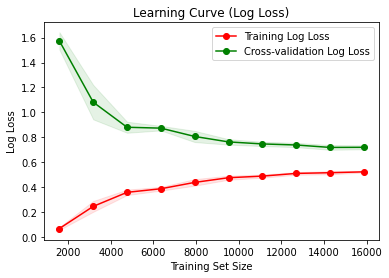

In [75]:
from sklearn.model_selection import learning_curve
from sklearn.metrics import make_scorer, log_loss

# Assuming neural_net is your MLPClassifier model

# Create a scorer from the log_loss function
log_loss_scorer = make_scorer(log_loss, greater_is_better=False, needs_proba=True)

train_sizes, train_scores, validation_scores = learning_curve(
    neural_net, X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5, scoring=log_loss_scorer, n_jobs=-1)

# Calculate mean and standard deviation for training set scores
train_mean = -np.mean(train_scores, axis=1)  # Note the negative sign
train_std = np.std(train_scores, axis=1)

# Calculate mean and standard deviation for validation set scores
validation_mean = -np.mean(validation_scores, axis=1)  # Note the negative sign
validation_std = np.std(validation_scores, axis=1)

# Plot the learning curve
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="r", alpha=0.1)
plt.fill_between(train_sizes, validation_mean - validation_std, validation_mean + validation_std, color="g", alpha=0.1)

plt.plot(train_sizes, train_mean, 'o-', color="r", label="Training Log Loss")
plt.plot(train_sizes, validation_mean, 'o-', color="g", label="Cross-validation Log Loss")

plt.title("Learning Curve (Log Loss)")
plt.xlabel("Training Set Size")
plt.ylabel("Log Loss")
plt.legend(loc="best")
plt.show()


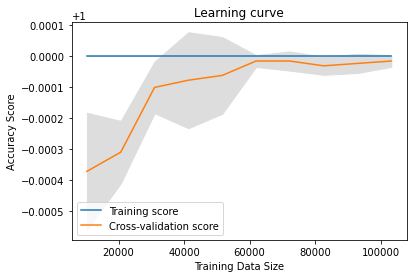

In [26]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    estimator=model, X=X_train_scaled, y=y_train, 
    train_sizes=np.linspace(0.1, 1.0, 10), cv=5, n_jobs=-1, scoring='accuracy'
)

# Calculate mean and standard deviation of train and test scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

plt.plot(train_sizes, train_mean, label='Training score')
plt.plot(train_sizes, test_mean, label='Cross-validation score')

plt.title('Learning curve')
plt.xlabel('Training Data Size')
plt.ylabel('Accuracy Score')
plt.legend(loc='best')
plt.show()
